In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import VerticalPitch, FontManager, Sbopen

In [3]:
#read in csv
df = pd.read_csv(r'C:\Users\bosta\Downloads\valladolidA.csv')

In [5]:
df = df[df['teamId']=='Barcelona']

In [7]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

C:\Users\bosta\AppData\Local\Temp\ipykernel_16628\1770253522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passer'] = df['playerId']
C:\Users\bosta\AppData\Local\Temp\ipykernel_16628\1770253522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recipient'] = df['playerId'].shift(-1)


In [9]:
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

In [11]:
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [12]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [13]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

C:\Users\bosta\AppData\Local\Temp\ipykernel_16628\4077243963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
C:\Users\bosta\AppData\Local\Temp\ipykernel_16628\4077243963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


In [14]:
#now we need to find the average locations and counts of the passes
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [15]:
average_locations


,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [16]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [17]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [18]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [19]:
pass_between = pass_between[pass_between['pass_count']>5]


In [22]:
pitch = Pitch()

In [23]:
pitch

Pitch(pitch_type='statsbomb', half=False, pitch_color='white', line_color='#b0b0b0', linewidth=2, line_zorder=0.9, linestyle=None, stripe=False, stripe_color='#c2d59d', stripe_zorder=0.6, pad_left=4, pad_right=4, pad_bottom=4, pad_top=4, positional=False, positional_zorder=0.8, positional_linewidth=2, positional_linestyle=None, positional_color='#eadddd', shade_middle=False, shade_color='#f2f2f2', shade_zorder=0.7, pitch_length=None, pitch_width=None, goal_type='line', goal_alpha=1, line_alpha=1, label=False, tick=False, axis=False, spot_scale=0.002, corner_arcs=False)

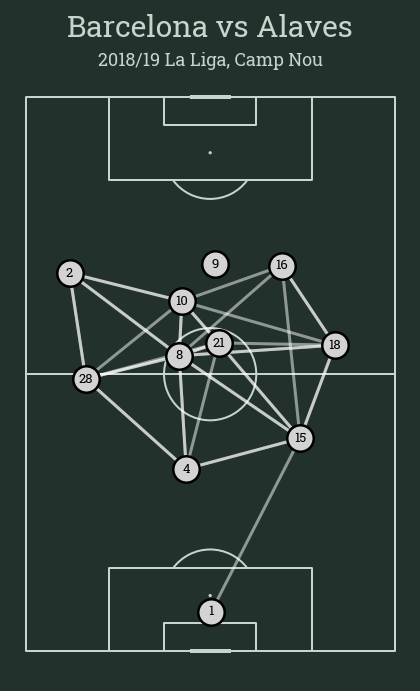

In [134]:
# Load a custom font.
from matplotlib.font_manager import FontProperties

URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
roboto = FontManager(URL)

fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0,
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.02)
fig.set_facecolor("#22312b")

lines = pitch.lines(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     lw = 3, color = 'w', ax = axs['pitch'], zorder = 1, alpha = .5)
nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 700, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=axs['pitch'])

for index, row in average_locations.iterrows():
    pitch.annotate(row.name, xy=(1.2*row.x, .8*row.y), c='black', va='center',
                   ha='center', size=13, weight='bold', ax=axs['pitch'], fontproperties=roboto.prop)
                
TITLE = f'Barcelona vs Alaves'
SUBTITLE = f'2018/19 La Liga, Camp Nou'
axs['title'].text(0.5, 0.7, TITLE, color='#c7d5cc',
                  va='center', ha='center', fontproperties=roboto.prop, fontsize=30)
axs['title'].text(0.5, 0.25, SUBTITLE, color='#c7d5cc',
                  va='center', ha='center', fontproperties=roboto.prop, fontsize=18)

plt.show()

In [69]:
average_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47
